# Introduction

The exponential growth in internet usage has led to the rapid rise of online shopping, also known as e-commerce. Total revenue from online sales is expected to hit US $2.7 trillion in 2021 with market penetration of 50.8% and compound annual growth rate (CAGR) of ~6% for the next 5 years. Many e-commerce platforms have become household names worldwide, such as Amazon, Alibaba, Mercadolibre and Zalando among others, whilst numerous traditional brick-and-mortar retailers have also shifted to an omni-channel approach. As such, understanding the behaviour and intention of online customers have become increasingly important for retailers in order to allow for more effective marketing and customer service, with the ultimate goal of boosting sales. For instance, such information could be used to determine what type of content should be offered to prospective buyers, or to keep track of relevant users  and suggest offers which will induce potential return visits that results in purchases. 

Meanwhile, the challenge faced in understanding and predicting online shopper behaviour stems from the fact that there is generally no individual interaction between the buyers and sellers. Historically, the approach would be simply to conduct indiscriminate marketing and provide a uniform customer experience. Alternatively, users could be directly surveyed regarding their preferences/intention. However, the former method is wasteful and lacks the effectiveness of a customised approach, while the latter method can be disruptive to the user experience, resulting in poorer conversion rates for both cases. 

To overcome this, (near) real-time analysis of shopper intent can be performed through indirect means via the collection of data in terms of user characteristics (such as their geographical location) as well as their browsing patterns, also known as click-stream analysis. 

# Problem & Learning Task

For this project, the defined problem at hand is to train a program to learn to identify the purchasing intent of online shoppers through the real-time analysis of visitor and session information. A program is said to "learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$." For our problem, $T$, $P$ and $E$ can be defined as

- Task $T$: Helping a website predict whether visitors will make a purchase through supervised learning
- Performance Measure $P$: Percentage of visitors correctly classified, with greater priority given to accurate classification of users that make purchases  
- Training Experience $E$: A database consisting of structured (numerical and/or categorical) attributes of the session and visitor information of online users and the respective given classfications   

With that with have a fully specified learning task at hand. To complete the design of the learning system, we must now choose

1. the exact type of knowledge to be learned
2. a representation for this target knowledge

For 1, our program needs to learn how to choose the most likely outcome from two possible outcomes ('True' or 'False', repsenting whether the user ends up making a purchase). This can be expressed through an ideal target function $f$ which accepts as input any set of feature values $X$ and produces an output from the set of possible outcomes ($true$, $false$) expressed mathematically below as
<center> $f: X \mapsto (true, false)$ </center> 

Having specified this ideal target function $f$, we now need to discover an operational description that approximates $f$. To do so, we need to choose a representation (2) that the learning program will use to describe the function that it will learn, denoted as $\hat{f}$. For this project, several representations (algorithms) will be explored: Decision Trees, Instance-Based learning, Bayesian Learning, Neural Networks and Model Ensembles. Their detailed representations and mathematical expressions will be covered in greater detail in the individual sections subsequently. 

References for these sections 

- https://www.statista.com/outlook/dmo/ecommerce/worldwide
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7256375/
-https://www.researchgate.net/publication/340058413_Analysis_of_Different_Predicting_Model_for_Online_Shoppers'_Purchase_Intention_from_Empirical_Data

# Exploration of Dataset: Online Shoppers Purchasing Intention

## Overview

The dataset selected for this project is the Online Shoppers Purchasing dataset and has been sourced from the UCI Machine Learning Repository. It is comprised of 12,330 sessions, where each session belongs to a different user in a 1-year period and features are split into 10 numerical and 8 categorical attributes. Of which, 9 relevant attributes have been selected (4 numerical and 5 categorical) for our study.

The 'Revenue' attribute is the target attribute (Class Label).

- Class Names: indicating a revenue when True else False - ['False', 'True']
- Numerical Features (float): ['ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates'] 
- Categorical Features: ['SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend']

We first begin with a general look at the entire dataset, followed by a more detailed analysis of the numerical and categorical features.

In [112]:
from main import *
data_frame_os = read_data_return_frame("online_shoppers_intention.csv")
data_frame_os

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.200000,0.200000,0.0,Feb,1,Returning_Visitor,False,False
1,64.000000,32.000000,0.000000,0.100000,0.0,Feb,1,Returning_Visitor,False,False
2,0.000000,0.000000,0.200000,0.200000,0.0,Feb,9,Returning_Visitor,False,False
3,2.666667,1.333333,0.050000,0.140000,0.0,Feb,2,Returning_Visitor,False,False
4,627.500000,62.750000,0.020000,0.050000,0.0,Feb,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...
12325,1783.791667,33.656447,0.007143,0.029031,0.0,Dec,1,Returning_Visitor,True,False
12326,465.750000,93.150000,0.000000,0.021333,0.0,Nov,1,Returning_Visitor,True,False
12327,184.250000,30.708333,0.083333,0.086667,0.0,Nov,1,Returning_Visitor,True,False
12328,346.000000,23.066667,0.000000,0.021053,0.0,Nov,3,Returning_Visitor,False,False


In [83]:
# Checking for Null Values
missing_value = pd.DataFrame(data_frame_os.isnull().sum(), columns = ['Null Counts'])
missing_value

,Zero Values
ProductRelated_Duration,0
ProductRelatedAve,0
BounceRates,0
ExitRates,0
SpecialDay,0
Month,0
Region,0
VisitorType,0
Weekend,0
Revenue,0


In [91]:
# Checking for duplicate values

duplicate = data_frame_os[data_frame_os.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
21,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
56,0.0,0.0,0.2,0.2,0.6,Feb,3,Returning_Visitor,False,False
64,0.0,0.0,0.2,0.2,0.0,Feb,4,Returning_Visitor,False,False
70,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
85,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...
12197,0.0,0.0,0.2,0.2,0.0,Nov,1,Returning_Visitor,False,False
12200,0.0,0.0,0.2,0.2,0.0,Dec,6,Returning_Visitor,True,False
12220,0.0,0.0,0.2,0.2,0.0,Nov,1,Returning_Visitor,False,False
12301,0.0,0.0,0.2,0.2,0.0,Nov,4,Returning_Visitor,False,False


## Numerical (Float) Features

"**Product Related Duration**" and "**Product Related Average**" represent the total and average time spent in each of the product related page categories visited by the visitor in a session respectively. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "**Bounce Rate**" and "**Exit Rate**" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

In [98]:
numerical_features = data_frame_os[['ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates']]
numerical_features.describe()

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,1194.746220,37.633690,0.022191,0.043073
std,1913.669288,44.767916,0.048488,0.048597
min,0.000000,0.000000,0.000000,0.000000
25%,184.137500,17.613281,0.000000,0.014286
50%,598.936905,28.878189,0.003112,0.025156
75%,1464.157213,45.084444,0.016813,0.050000
max,63973.522230,1411.000000,0.200000,0.200000


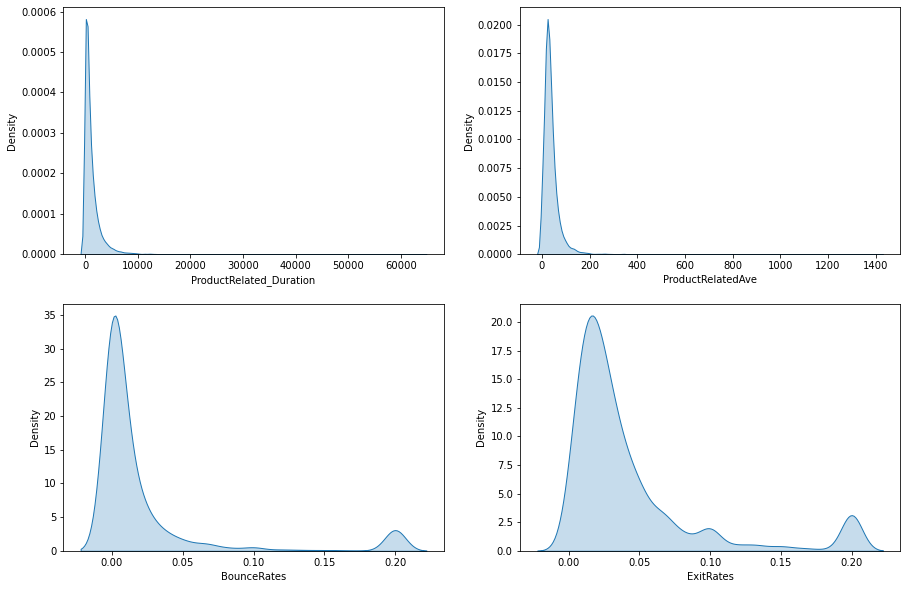

In [99]:
features = numerical_features.columns.tolist()

plt.figure(figsize=(15, 10))

for indx, var  in enumerate(features):
    plt.subplot(2, 2, indx+1)
    sns.kdeplot(numerical_features[var],shade=True)

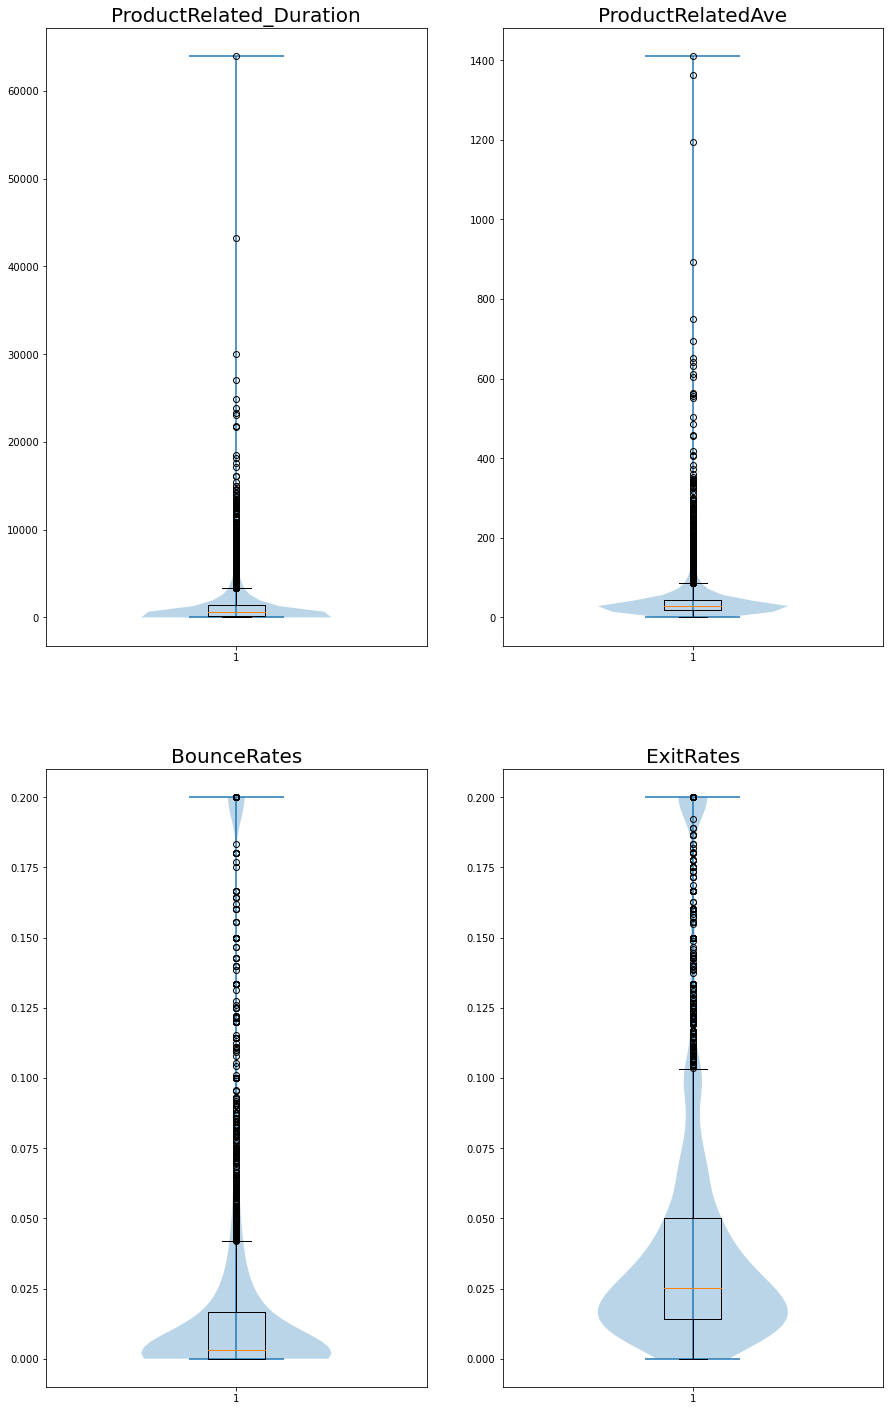

In [65]:
plt.figure(figsize=(15, 25))
plt.tight_layout()

for indx, var  in enumerate(features):
    plt.subplot(2, 2, indx+1)
    plt.violinplot(numerical_features[var])
    plt.boxplot(numerical_features[var])
    plt.gca().set_title(var, fontsize=20)

In [95]:
print(data_frame_os['ProductRelated_Duration'].skew())
print(data_frame_os['ProductRelatedAve'].skew())
print(data_frame_os['BounceRates'].skew())
print(data_frame_os['ExitRates'].skew())

7.263227682561322
10.295020344023325
2.9478552666955347
2.1487889999009804


## Categorical Features

The "**Special Day**" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. This variable can take on values between 0-1 in increments of 0.2. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes **region**, **visitor type** as returning or new visitor, a Boolean value indicating whether the date of the visit is **weekend**, and **month** of the year.

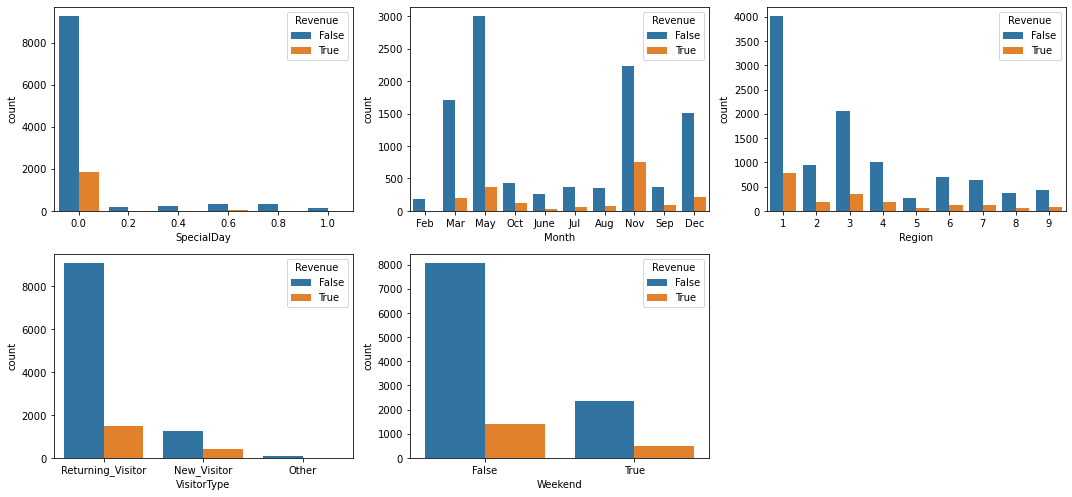

In [93]:
def count_plot(df, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(3, 3, indx+1)
        g = sns.countplot(df[var], hue= df['Revenue'])
    plt.tight_layout()

numerical_features = data_frame_os[['SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend']]
import warnings
warnings.filterwarnings('ignore')
count_plot(data_frame_os, numerical_features) # Plot the categorical features

## Correlation

In [114]:
numerical_features2 = data_frame_os[['ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates', 'Revenue']]
numerical_features2.corr(method='pearson').style.format('{:.2}').background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,Revenue
ProductRelated_Duration,1.0,0.21,-0.18,-0.25,0.15
ProductRelatedAve,0.21,1.0,-0.19,-0.16,0.042
BounceRates,-0.18,-0.19,1.0,0.91,-0.15
ExitRates,-0.25,-0.16,0.91,1.0,-0.21
Revenue,0.15,0.042,-0.15,-0.21,1.0


## Common Transformations